<a href="https://colab.research.google.com/github/LTNguyen174/6351071050_Lab3/blob/main/6351071050_LAB3_Bai5(trang_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Đã tải thành công bộ dữ liệu MNIST từ Keras.
Đang xử lý trên bộ dữ liệu: MNIST (Original 28x28)
Kích thước ma trận đặc trưng: (10000, 784)

Đang chạy K-Means với k=10...
Adjusted Rand Index (ARI): 0.3791
Độ chính xác (Accuracy) ước tính: 0.5887


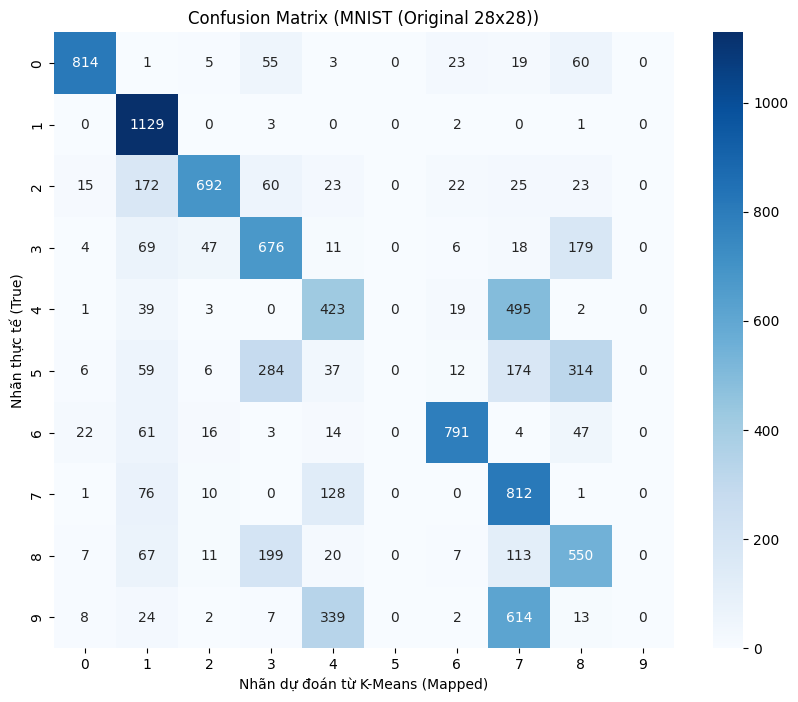

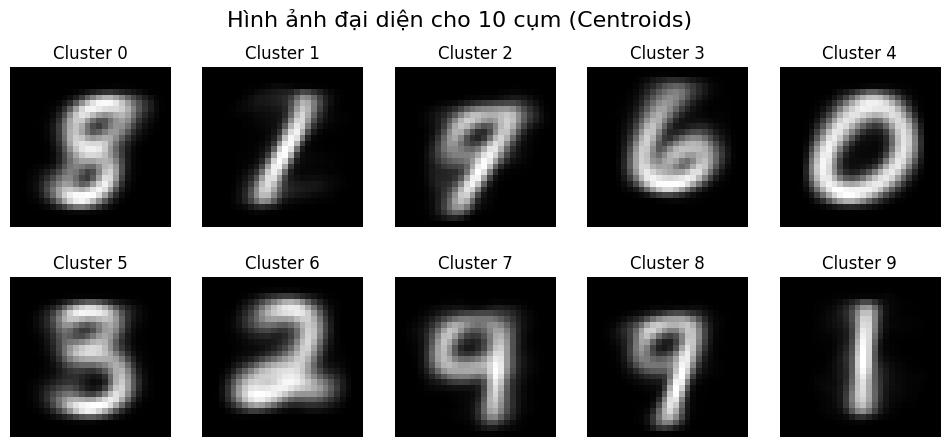

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
from scipy.stats import mode
from sklearn.datasets import load_digits
from tensorflow.keras.datasets import mnist

def load_data_robust():
    # Cố gắng tải MNIST gốc từ Keras (Yêu cầu có Internet)
    try:
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        # Sử dụng tập test (10,000 ảnh) để demo cho nhanh
        X = x_test.reshape(-1, 784).astype('float32') / 255.0
        y = y_test
        dataset_name = "MNIST (Original 28x28)"
        image_shape = (28, 28)
        print("Đã tải thành công bộ dữ liệu MNIST từ Keras.")
    except Exception as e:
        # Nếu không có mạng, dùng bộ Digits có sẵn trong Sklearn (8x8 pixel)
        print("Không thể tải MNIST (do không có internet). Chuyển sang dùng bộ Digits (sklearn).")
        digits = load_digits()
        X = digits.data.astype('float32') / 16.0 # Chuẩn hóa về 0-1
        y = digits.target
        dataset_name = "Digits (sklearn 8x8)"
        image_shape = (8, 8)

    return X, y, dataset_name, image_shape

# 1. Tải và chuẩn bị dữ liệu
X, y, dataset_name, image_shape = load_data_robust()
print(f"Đang xử lý trên bộ dữ liệu: {dataset_name}")
print(f"Kích thước ma trận đặc trưng: {X.shape}")

# 2. Gom cụm K-Means
print("\nĐang chạy K-Means với k=10...")
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
y_pred_clusters = kmeans.fit_predict(X)

# 3. Đánh giá và So sánh

# a) Adjusted Rand Index (ARI) - Đo độ tương đồng giữa 2 cách phân cụm
ari = adjusted_rand_score(y, y_pred_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# b) Tính Accuracy (Gán nhãn cho cụm theo quy tắc đa số)
labels_mapped = np.zeros_like(y_pred_clusters)
for i in range(10):
    mask = (y_pred_clusters == i)
    if np.sum(mask) > 0:
        # Tìm nhãn thực tế xuất hiện nhiều nhất trong cụm này
        most_frequent = mode(y[mask], keepdims=True)[0][0]
        labels_mapped[mask] = most_frequent

acc = accuracy_score(y, labels_mapped)
print(f"Độ chính xác (Accuracy) ước tính: {acc:.4f}")

# 4. Trực quan hóa
# a) Ma trận nhầm lẫn (Confusion Matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y, labels_mapped), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix ({dataset_name})')
plt.ylabel('Nhãn thực tế (True)')
plt.xlabel('Nhãn dự đoán từ K-Means (Mapped)')
plt.show()

# b) Hình ảnh tâm cụm (Centroids)
centroids = kmeans.cluster_centers_.reshape(10, image_shape[0], image_shape[1])
plt.figure(figsize=(12, 5))
plt.suptitle(f"Hình ảnh đại diện cho 10 cụm (Centroids)", fontsize=16)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(centroids[i], cmap='gray')
    plt.title(f"Cluster {i}")
    plt.axis('off')
plt.show()